**Multiple Linear Regression** : The Number of Independent variable is more than one   
Create an MLR Model to predict read(dependent) based on two independent variables write and science and then calculate the accuracy of the model.

In this case the model equation is 
beta_read = beta_0 + beta_1 * write + beta_2 * read 

The coding for the X dataframe now is  
X = df[['write','science']]


In [4]:
import pandas as pd 
import numpy as np 
import scipy.stats as sc 
import statsmodels.api as sm 
import os 

In [5]:
df = pd.read_csv('./hsb2.csv')

In [6]:
X = df[['write','science']] 
Y = df['read'] 
X = sm.add_constant(X) 
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     91.13
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           9.52e-29
Time:                        17:42:04   Log-Likelihood:                -683.30
No. Observations:                 200   AIC:                             1373.
Df Residuals:                     197   BIC:                             1382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0874      3.258      2.789      0.006       2.663      15.512
write          0.3805      0.068      5.627      0.000       0.247       0.514
science        0.4448      0.065      6.870      0.000       0.317       0.572
==============================================================================
Omnibus:                        2.445   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.184
Skew:                          -0.159   Prob(JB):                        0.335
Kurtosis:                       2.599   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:

df['read_pred'] = 9.0874 + 0.3805 * df['write'] + 0.4448 * df['science'] 
df['error'] = (df['read_pred'] - df['read']).abs()
df['rel_error'] = df['error'] / df['read'] 
df['rel_error'].mean()

0.12046436842290265

To find the correlation between the variables import the function pearsonr from scipy.stats 
To find the correlation between revenue and percentOccupancy 
corr, _ = pearsonr(df['PercentOccupancy'],df['revenue']) 

type corr and runit to get the value of the correlation

In [8]:
df.head()

,id,Gender,race,ses,schtyp,prog,read,write,math,science,socst,read_pred,error,rel_error
0,70,0,4,1,1,1,57,52,41,47,57,49.7790,7.2210,0.126684
1,121,1,4,2,1,3,68,59,53,63,61,59.5593,8.4407,0.124128
2,86,0,4,3,1,1,44,33,54,58,31,47.4423,3.4423,0.078234
3,141,0,4,3,1,3,63,44,47,53,56,49.4038,13.5962,0.215813
4,172,0,4,2,1,2,47,52,57,53,61,52.4478,5.4478,0.115911


In [9]:
corr1 , _ = sc.pearsonr(df['read'], df['write']) 
corr1

0.5967764790880452

In [10]:
corr1 , _ = sc.pearsonr(df['read'], df['math'])
corr1 

0.6622801251558604

In [11]:
corr1 , _ = sc.pearsonr(df['read'], df['science'])
corr1 

0.630157870118315

In [12]:
corr1 , _ = sc.pearsonr(df['read'], df['socst'])
corr1 

0.6214842723887142

In [13]:
X = df[['math','science']] 
Y = df['read'] 
X = sm.add_constant(X) 
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     104.0
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.49e-31
Time:                        17:42:13   Log-Likelihood:                -676.74
No. Observations:                 200   AIC:                             1359.
Df Residuals:                     197   BIC:                             1369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9505      3.113      2.554      0.011       1.812      14.089
math           0.4813      0.070      6.868      0.000       0.343       0.619
science        0.3653      0.066      5.509      0.000       0.235       0.496
==============================================================================
Omnibus:                        0.646   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.703
Skew:                          -0.133   Prob(JB):                        0.704
Kurtosis:                       2.886   Cond. No.                         459.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:

df['read_pred'] = 7.9505 + 0.4813 * df['math'] + 0.3653 * df['science'] 
df['error'] = (df['read_pred'] - df['read']).abs()
df['rel_error'] = df['error'] / df['read'] 
df['rel_error'].mean()

0.11278340893112927

In [15]:
X = df['math'] 
Y = df['read'] 
X = sm.add_constant(X) 
model = sm.OLS(Y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     154.7
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.28e-26
Time:                        17:42:16   Log-Likelihood:                -691.06
No. Observations:                 200   AIC:                             1386.
Df Residuals:                     198   BIC:                             1393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0725      3.116      4.516      0.000       7.928      20.217
math           0.7248      0.058     12.438      0.000       0.610       0.840
==============================================================================
Omnibus:                        1.981   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.997
Skew:                           0.237   Prob(JB):                        0.368
Kurtosis:                       2.880   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df['read_pred'] = 14.0725 + 0.7248 * df['science'] 
df['error'] = (df['read_pred'] - df['read']).abs()
df['rel_error'] = df['error'] / df['read'] 
df['rel_error'].mean()


0.12871210524745794

In [17]:
X = df[['math','science','write','socst']] 
Y = df['read'] 
X = sm.add_constant(X) 
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     69.74
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.44e-36
Time:                        17:42:17   Log-Likelihood:                -659.98
No. Observations:                 200   AIC:                             1330.
Df Residuals:                     195   BIC:                             1346.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9461      3.087      0.630      0.529      -4.143       8.035
math           0.3029      0.073      4.173      0.000       0.160       0.446
science        0.2737      0.064      4.252      0.000       0.147       0.401
write          0.1104      0.071      1.548      0.123      -0.030       0.251
socst          0.2733      0.057      4.759      0.000       0.160       0.387
==============================================================================
Omnibus:                        0.371   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.518
Skew:                          -0.014   Prob(JB):                        0.772
Kurtosis:                       2.752   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df['read_pred'] = 1.9461 + 0.3029 * df['math'] + 0.2737* df['science'] + 0.1104 * df['write'] + 0.2733 * df['socst']
df['error'] = (df['read_pred'] - df['read']).abs()
df['rel_error'] = df['error'] / df['read'] 
df['rel_error'].mean()

0.10583163721832348

TO create a scatter plot b/w dependent and independent variable showing the variation. 
    - Create a scatter b/w the dependent variable read(d) and math(id) 
In python :



In [19]:
import matplotlib.pyplot as plt 

From the plot we can as the occupancy increases the revenue also increases 
Make the scatter plot b/w the following : 
    - revenue v/s occupancy 
    - read v/s write 
    - read v/s math 
    - read v/s science 
    - read v/s socst 

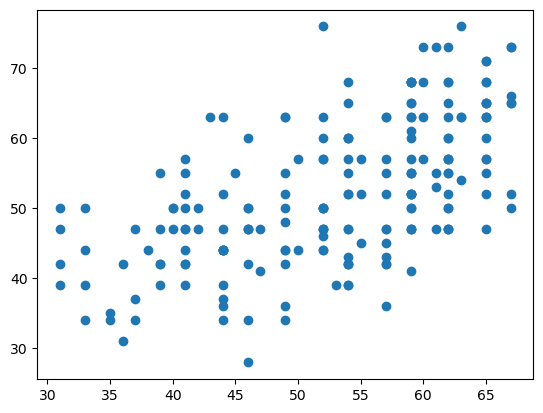

In [20]:
plt.scatter(df['write'],df['read'])

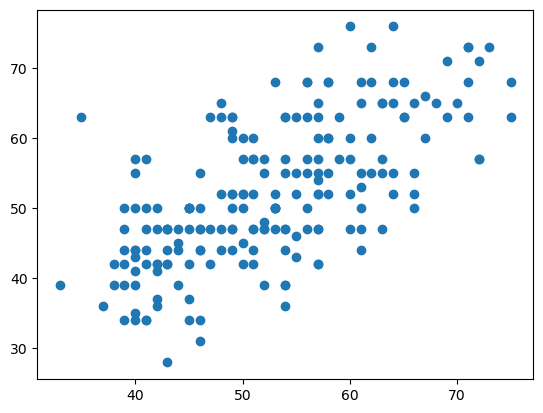

In [21]:
plt.scatter(df['math'],df['read'])

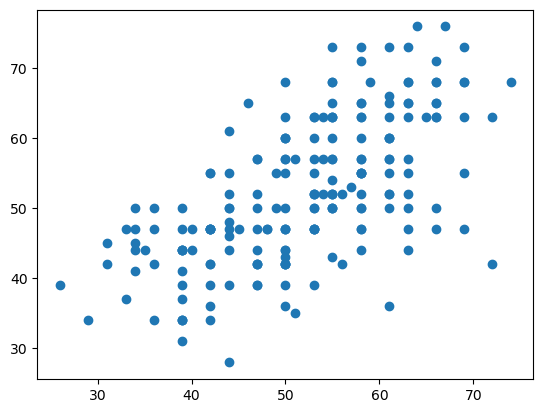

In [22]:
plt.scatter(df['science'],df['read'])

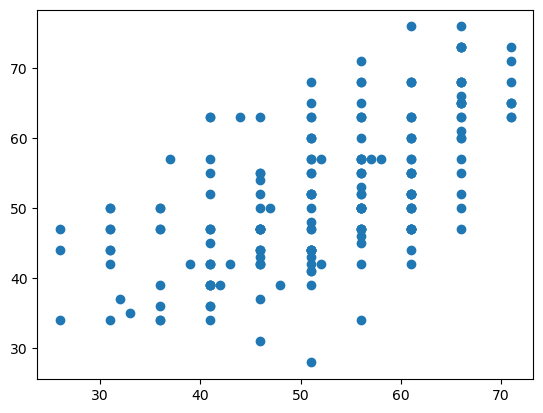

In [23]:
plt.scatter(df['socst'],df['read'])

1. To create a new variable in python Showing the percentage of marks 
2. Based on the percentage for each student i need to write down first second third and fail 
3. To create a new variable total in python 


In [24]:
df['total'] = df['read'] + df['write'] + df['math'] + df['science'] + df['socst']

In [25]:
df['percentage'] = df['total'] / 5 

Criteria for grade is - 
    upto 40 - fail 
    greater than 40 and less than 50 - grade third
    greater than 50 and less than 80 - grade second
    greater than 80 <= 100 grade first 


In [26]:
bins = [0,40,50,80,100] 
labels = ['fail','third','second','first'] 
df['grade'] = pd.cut(df['percentage'],bins , labels = labels)

In [27]:
df.head()

,id,Gender,race,ses,schtyp,prog,read,write,math,science,socst,read_pred,error,rel_error,total,percentage,grade
0,70,0,4,1,1,1,57,52,41,47,57,48.5478,8.4522,0.148284,254,50.8,second
1,121,1,4,2,1,3,68,59,53,63,61,58.4278,9.5722,0.140768,304,60.8,second
2,86,0,4,3,1,1,44,33,54,58,31,46.2928,2.2928,0.052109,220,44.0,third
3,141,0,4,3,1,3,63,44,47,53,56,50.8509,12.1491,0.192843,263,52.6,second
4,172,0,4,2,1,2,47,52,57,53,61,56.1296,9.1296,0.194247,270,54.0,second


create categorical variable gender_gr where 0 - boy and 1 is a girl 
create categorical variable prog_gr where 1 is cs and 2 is ec and 3 is it 
                            ses_gr where 1 is low and 2 is middle and 3 is high 
                            schtyp_gr where 1 is public and 2 is private 

In [30]:
bins = [-1, 0, 1] 
labels = ['boy','girl'] 
df['gender_gr'] = pd.cut(df['Gender'],bins , labels = labels)

Find the number of boys and girls in hsb2 database 
find the number of students who have opted each of the programs cs ec and it  
find the number of students who come from public school and private school 


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          200 non-null    int64   
 1   Gender      200 non-null    int64   
 2   race        200 non-null    int64   
 3   ses         200 non-null    int64   
 4   schtyp      200 non-null    int64   
 5   prog        200 non-null    int64   
 6   read        200 non-null    int64   
 7   write       200 non-null    int64   
 8   math        200 non-null    int64   
 9   science     200 non-null    int64   
 10  socst       200 non-null    int64   
 11  read_pred   200 non-null    float64 
 12  error       200 non-null    float64 
 13  rel_error   200 non-null    float64 
 14  total       200 non-null    int64   
 15  percentage  200 non-null    float64 
 16  grade       200 non-null    category
dtypes: category(1), float64(4), int64(12)
memory usage: 25.5 KB
